In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import re
import matplotlib as mpl
from nltk.translate.bleu_score import sentence_bleu

In [2]:
mpl.rcParams['font.sans-serif'] = ['FreeSerif'  # fc-list :lang=hi family
                                   ]
font = {'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

In [3]:
test = pd.read_pickle('results/test_seq2seq_with_attention.pickle')

In [4]:
test

,english,hindi,cleaned_english,english_len,cleaned_hindi,hindi_len,encoder_input,decoder_input,decoder_output,generated_translation,bleu_score,generated_translation_attention,attention_matrix,bleu_score_attention
33340,Gonna keep getting naughtier.\n,Naughtier रही रखने वाला.\n,"[gonna, keep, getting, naughtier]",4,"[<begin>, naughtier, रही, रखने, वाला, <end>]",4,"[0, 0, 0, 0, 2679, 1390, 624, 366]","[1, 3190, 21, 480, 155, 6, 0, 0, 0, 0, 0, 0, 0...","[3190, 21, 480, 155, 6, 0, 0, 0, 0, 0, 0, 0, 0...","[<begin>, कुछ, को, को, जाओ, <end>]",6.287309e-232,"[<begin>, चलो, कुछ, हो, जाओ, <end>]","[[0.040561367, 0.037163433, 0.034491178, 0.033...",7.750412e-232
6195,- Looks like he did.\n,- जैसे वह करता था.\n,"[looks, like, he, did]",4,"[<begin>, जैसे, वह, करता, था, <end>]",4,"[0, 0, 0, 0, 202, 137, 197, 881]","[1, 622, 68, 823, 134, 6, 0, 0, 0, 0, 0, 0, 0,...","[622, 68, 823, 134, 6, 0, 0, 0, 0, 0, 0, 0, 0,...","[<begin>, वह, वह, भी, किया, है, <end>]",2.068721e-01,"[<begin>, बहुत, बहुत, वह, कहा, <end>]","[[0.00042468848, 0.0004196551, 0.0004222404, 0...",2.574866e-01
27090,"You are beautiful, so beautiful!\n",तुम कितनी सुंदर हो!\n,"[you, are, beautiful, so, beautiful]",5,"[<begin>, तुम, कितनी, सुंदर, हो, <end>]",4,"[0, 0, 0, 488, 65, 488, 95, 21]","[1, 30, 2224, 558, 36, 6, 0, 0, 0, 0, 0, 0, 0,...","[30, 2224, 558, 36, 6, 0, 0, 0, 0, 0, 0, 0, 0,...","[<begin>, तुम, बहुत, बहुत, हैं, <end>]",1.824016e-01,"[<begin>, तुम, बहुत, बहुत, रहे, हैं, <end>]","[[0.00032282778, 0.00032212658, 0.00032274466,...",1.573265e-01
57874,Go down the hallway.\n,हॉलवे से नीचे जाओ।\n,"[go, down, the, hallway]",4,"[<begin>, हॉलवे, से, नीचे, जाओ, <end>]",4,"[0, 0, 0, 0, 2508, 6, 289, 52]","[1, 2973, 71, 333, 235, 6, 0, 0, 0, 0, 0, 0, 0...","[2973, 71, 333, 235, 6, 0, 0, 0, 0, 0, 0, 0, 0...","[<begin>, नीचे, जाओ, <end>]",3.246525e-01,"[<begin>, जाओ, जाओ, <end>]","[[0.026004583, 0.023717828, 0.020698523, 0.018...",9.852860e-02
39140,Have your tech stand down.\n,अपनीतकनीकनीचेखड़ेहै.\n,"[have, your, tech, stand, down]",5,"[<begin>, अपनीतकनीकनीचेखड़ेहै, <end>]",1,"[0, 0, 0, 289, 1237, 4205, 46, 162]","[1, 5836, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5836, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[<begin>, अपने, नीचे, <end>]",1.469266e-01,"[<begin>, अपने, अपने, घर, है, <end>]","[[0.020826193, 0.019872798, 0.019018907, 0.022...",2.864418e-78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39262,Victoria will report your rescue.\n,विक्टोरिया अपने बचाव रिपोर्ट करेंगे.\n,"[victoria, will, report, your, rescue]",5,"[<begin>, विक्टोरिया, अपने, बचाव, रिपोर्ट, करे...",5,"[0, 0, 0, 3875, 46, 3053, 157, 1021]","[1, 1181, 149, 786, 3632, 501, 6, 0, 0, 0, 0, ...","[1181, 149, 786, 3632, 501, 6, 0, 0, 0, 0, 0, ...","[<begin>, अपने, अपने, को, को, को, <end>]",1.331113e-01,"[<begin>, अपने, अपने, को, को, <end>]","[[0.0062973914, 0.00627357, 0.0063357214, 0.00...",1.083736e-01
73263,You're not leaving me.\n,तुम मुझे नहीं जा रहे हैं।\n,"[you, are, not, leaving, me]",5,"[<begin>, तुम, मुझे, नहीं, जा, रहे, हैं, <end>]",6,"[0, 0, 0, 71, 1095, 23, 95, 21]","[1, 30, 77, 22, 434, 190, 54, 6, 0, 0, 0, 0, 0...","[30, 77, 22, 434, 190, 54, 6, 0, 0, 0, 0, 0, 0...","[<begin>, तुम, मुझे, नहीं, कर, रहे, हैं, <end>]",8.395876e-01,"[<begin>, तुम, मुझे, नहीं, कर, रहे, हैं, <end>]","[[0.0014904736, 0.0014862147, 0.0014938021, 0....",8.395876e-01
30255,"Good job, buddy. Here.\n",बढ़िया काम किया दोस्त.\n,"[good, job, buddy, here]",4,"[<begin>, बढ़िया, काम, किया, दोस्त, <end>]",4,"[0, 0, 0, 0, 66, 1458, 1613, 434]","[1, 1556, 304, 395, 151, 6, 0, 0, 0, 0, 0, 0, ...","[1556, 304, 395, 151, 6, 0, 0, 0, 0, 0, 0, 0, ...","[<begin>, अच्छा, अच्छा, है, <end>]",4.380333e-155,"[<begin>, कुछ, कुछ, कुछ, तरह, <end>]","[[0.009649399, 0.009314874, 0.00912114, 0.0092...",4.888717e-155
73601,"That's a good idea, honey.\n","यह एक अच्छा विचार है, शहद है।\n","[that, is, a, good, idea, honey]",6,"[<begin>, यह, एक, अच्छा, विचार, है, शहद, है, <...",7,"[0, 0, 1068, 211, 434, 17, 2, 58]","[1, 41, 120, 253, 2

In [5]:
just_translations = test[['cleaned_english','cleaned_hindi','generated_translation','generated_translation_attention']]

In [6]:
just_translations.to_csv('test_translations.csv')

In [7]:
test.describe()

,english_len,hindi_len,bleu_score,bleu_score_attention
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,4.652500,5.072000,2.033225e-01,2.000581e-01
std,0.860299,1.877652,2.004191e-01,2.007552e-01
min,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,4.000000,2.405452e-78,2.477779e-78
50%,5.000000,5.000000,1.787681e-01,1.723687e-01
75%,5.000000,6.000000,3.311098e-01,3.274298e-01
max,8.000000,28.000000,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='english_len'>

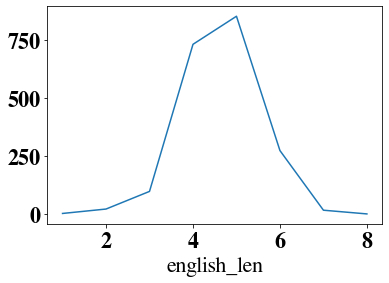

In [8]:
test.groupby('english_len')['hindi'].count().plot()

<AxesSubplot:xlabel='english_len'>

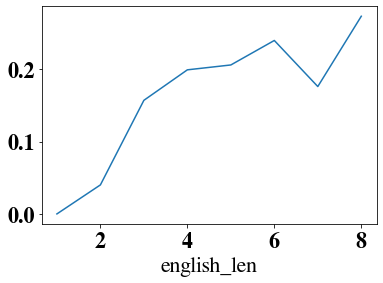

In [9]:
test.groupby('english_len')['bleu_score'].mean().plot()

<AxesSubplot:xlabel='english_len'>

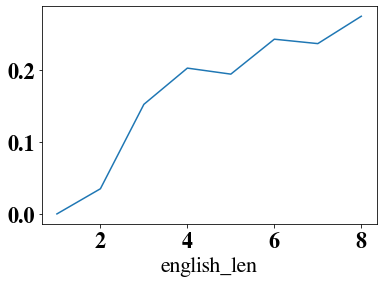

In [10]:
test.groupby('english_len')['bleu_score_attention'].mean().plot()

In [11]:
def show_attention(entry):
    xx = entry.cleaned_english
    yy = entry.generated_translation_attention[1:-1]
    
    matrix = entry.attention_matrix
    matrix = matrix[:,::-1][:len(yy),:len(xx)]

    fig, ax = plt.subplots(figsize=(5,5))
#     ax.set_figheight(15)
    im = ax.imshow(matrix)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xx)))
    ax.set_yticks(np.arange(len(yy)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(xx)
    ax.set_yticklabels(yy)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(yy)):
        for j in range(len(xx)):
            text = ax.text(j, i, round(matrix[i, j],2),
                           ha="center", va="center", color="w")

#     fig.tight_layout()
    plt.show()


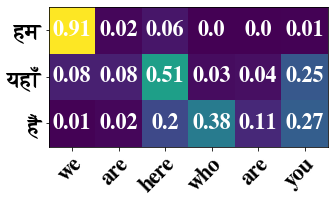

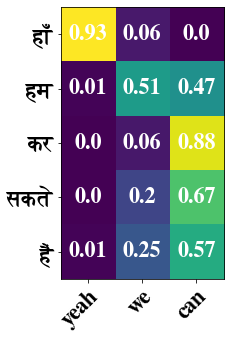

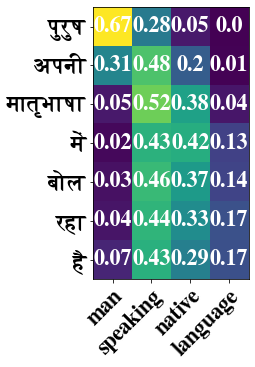

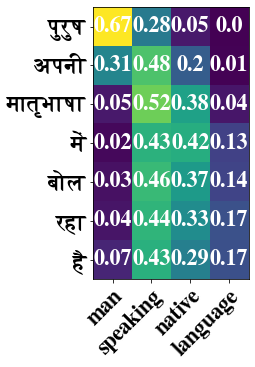

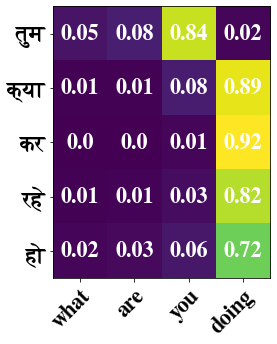

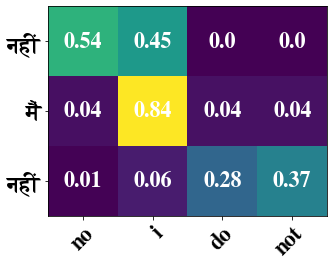

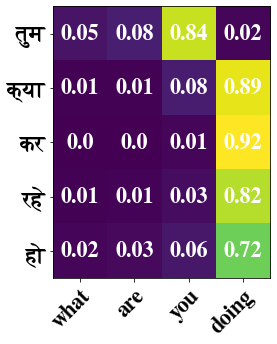

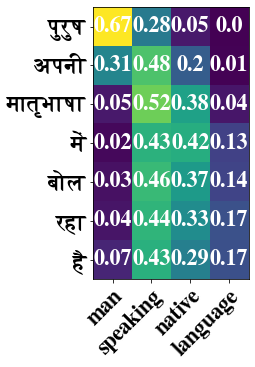

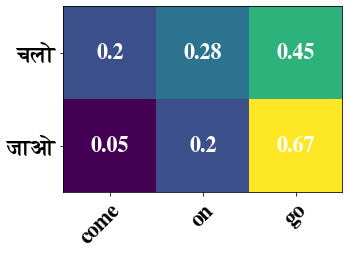

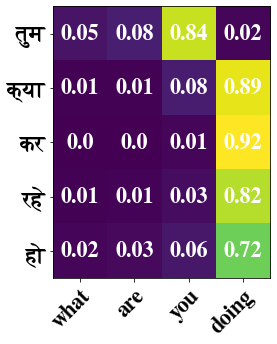

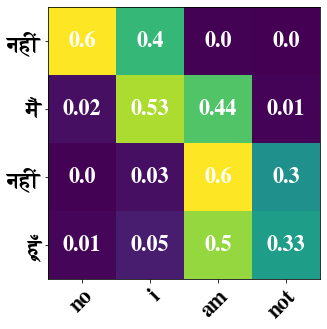

In [12]:
_=test[test['bleu_score_attention']>0.95].apply(show_attention,axis=1)

In [13]:
# 20 random samples
to_be_analized = test.sample(frac=0.01,random_state=18)
to_be_analized

,english,hindi,cleaned_english,english_len,cleaned_hindi,hindi_len,encoder_input,decoder_input,decoder_output,generated_translation,bleu_score,generated_translation_attention,attention_matrix,bleu_score_attention
6958,I'm sure you know this.\n,मैं यकीन है कि आप यह पता कर रहा हूँ.\n,"[i, am, sure, you, know, this]",6,"[<begin>, मैं, यकीन, है, कि, आप, यह, पता, कर, ...",10,"[0, 0, 3, 223, 21, 442, 74, 73]","[1, 81, 125, 5, 65, 186, 41, 259, 45, 46, 86, ...","[81, 125, 5, 65, 186, 41, 259, 45, 46, 86, 6, ...","[<begin>, मैं, तुम्हें, पता, है, कि, यह, है, <...",4.002452e-01,"[<begin>, मैं, तुम्हें, बहुत, बहुत, हूँ, <end>]","[[0.00027946456, 0.00027997515, 0.00048670417,...",1.453949e-01
19150,-What are you doing?\n,- क्या कर रहे हो?\n,"[what, are, you, doing]",4,"[<begin>, क्या, कर, रहे, हो, <end>]",4,"[0, 0, 0, 0, 37, 21, 95, 90]","[1, 176, 45, 190, 36, 6, 0, 0, 0, 0, 0, 0, 0, ...","[176, 45, 190, 36, 6, 0, 0, 0, 0, 0, 0, 0, 0, ...","[<begin>, तुम, क्या, कर, रहे, हो, <end>]",7.562722e-01,"[<begin>, तुम, क्या, कर, रहे, हो, <end>]","[[0.0025124901, 0.002484685, 0.0024499784, 0.0...",7.562722e-01
83761,"- Cheers, thank you.\n","सज्जनों, धन्यवाद।\n","[cheers, thank, you]",3,"[<begin>, सज्जनों, धन्यवाद, <end>]",2,"[0, 0, 0, 0, 0, 21, 259, 1452]","[1, 1710, 300, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1710, 300, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[<begin>, ओह, तुम, <end>]",2.597340e-232,"[<begin>, अरे, तुम, <end>]","[[0.0026833778, 0.0022293597, 0.0020376542, 0....",3.571883e-232
66647,I like our farm.\n,मुझे हमारे खेत पसंद हैं .\n,"[i, like, our, farm]",4,"[<begin>, मुझे, हमारे, खेत, पसंद, हैं, <end>]",5,"[0, 0, 0, 0, 937, 335, 197, 73]","[1, 77, 561, 1075, 465, 54, 6, 0, 0, 0, 0, 0, ...","[77, 561, 1075, 465, 54, 6, 0, 0, 0, 0, 0, 0, ...","[<begin>, मैं, बहुत, की, तरह, <end>]",4.978509e-155,"[<begin>, मैं, अपने, घर, की, जरूरत, है, <end>]","[[0.0055135633, 0.005226924, 0.0050668838, 0.0...",3.347969e-78
74263,How does it feel there?\n,यह कैसे वहाँ लग रहा है?\n,"[how, does, it, feel, there]",5,"[<begin>, यह, कैसे, वहाँ, लग, रहा, है, <end>]",6,"[0, 0, 0, 16, 450, 43, 1180, 32]","[1, 41, 42, 51, 614, 46, 5, 6, 0, 0, 0, 0, 0, ...","[41, 42, 51, 614, 46, 5, 6, 0, 0, 0, 0, 0, 0, ...","[<begin>, यह, यह, क्या, है, <end>]",2.046518e-01,"[<begin>, क्या, क्या, <end>]","[[0.00069114234, 0.0006889197, 0.00069901923, ...",2.147953e-155
86683,So why is he coming?\n,तो क्यों आ रहा है?\n,"[so, why, is, he, coming]",5,"[<begin>, तो, क्यों, आ, रहा, है, <end>]",5,"[0, 0, 0, 323, 137, 2, 94, 65]","[1, 34, 112, 20, 46, 5, 6, 0, 0, 0, 0, 0, 0, 0...","[34, 112, 20, 46, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0...","[<begin>, वह, है, कि, क्या, है, <end>]",3.114902e-01,"[<begin>, तो, वह, क्या, है, <end>]","[[0.0016470138, 0.0016435533, 0.0016665969, 0....",3.575275e-01
78155,You're going to be okay.\n,तुम ठीक हो जा रहे हैं।\n,"[you, are, going, to, be, okay]",6,"[<begin>, तुम, ठीक, हो, जा, रहे, हैं, <end>]",6,"[0, 0, 86, 251, 149, 572, 95, 21]","[1, 30, 98, 36, 434, 190, 54, 6, 0, 0, 0, 0, 0...","[30, 98, 36, 434, 190, 54, 6, 0, 0, 0, 0, 0, 0...","[<begin>, तुम, यहाँ, जा, रहे, हो, <end>]",5.447874e-01,"[<begin>, तुम, यहाँ, जा, रहे, हो, <end>]","[[0.00407135, 0.0040307757, 0.022683822, 0.009...",5.447874e-01
33801,Let's get out of here.\n,चलो यहाँ से चले जाओ.\n,"[let, us, get, out, of, here]",6,"[<begin>, चलो, यहाँ, से, चले, जाओ, <end>]",5,"[0, 0, 66, 54, 234, 167, 51, 50]","[1, 58, 74, 71, 708, 235, 6, 0, 0, 0, 0, 0, 0,...","[58, 74, 71, 708, 235, 6, 0, 0, 0, 0, 0, 0, 0,...","[<begin>, यहाँ, यहाँ, से, जाओ, <end>]",5.813198e-01,"[<begin>, चलो, यहाँ, से, जाओ, <end>]","[[0.018652495, 0.01894932, 0.17481996, 0.04619...",7.494471e-01
20350,That bitch is gigantic.\n,उस कुतिया से बड़ा है.\n,"[that, bitch, is, gigantic]",4,"[<begin>, उस, कुतिया, से, बड़ा, है, <end>]",5,"[0, 0, 0, 0, 1532, 2, 862, 58]","[1, 249, 989, 71, 268, 5, 6, 0, 0, 0, 0, 0, 0,...","[249, 989, 71, 268, 5, 6, 0, 0, 0, 0, 0, 0, 0,...","[<begin>, यह, क्या, है, <end>]",1.397640e-01,"[<begin>, कि, क्या, है, <end>

In [14]:
to_be_analized[['cleaned_english','cleaned_hindi','generated_translation','generated_translation_attention']]

,cleaned_english,cleaned_hindi,generated_translation,generated_translation_attention
6958,"[i, am, sure, you, know, this]","[<begin>, मैं, यकीन, है, कि, आप, यह, पता, कर, ...","[<begin>, मैं, तुम्हें, पता, है, कि, यह, है, <...","[<begin>, मैं, तुम्हें, बहुत, बहुत, हूँ, <end>]"
19150,"[what, are, you, doing]","[<begin>, क्या, कर, रहे, हो, <end>]","[<begin>, तुम, क्या, कर, रहे, हो, <end>]","[<begin>, तुम, क्या, कर, रहे, हो, <end>]"
83761,"[cheers, thank, you]","[<begin>, सज्जनों, धन्यवाद, <end>]","[<begin>, ओह, तुम, <end>]","[<begin>, अरे, तुम, <end>]"
66647,"[i, like, our, farm]","[<begin>, मुझे, हमारे, खेत, पसंद, हैं, <end>]","[<begin>, मैं, बहुत, की, तरह, <end>]","[<begin>, मैं, अपने, घर, की, जरूरत, है, <end>]"
74263,"[how, does, it, feel, there]","[<begin>, यह, कैसे, वहाँ, लग, रहा, है, <end>]","[<begin>, यह, यह, क्या, है, <end>]","[<begin>, क्या, क्या, <end>]"
86683,"[so, why, is, he, coming]","[<begin>, तो, क्यों, आ, रहा, है, <end>]","[<begin>, वह, है, कि, क्या, है, <end>]","[<begin>, तो, वह, क्या, है, <end>]"
78155,"[you, are, going, to, be, okay]","[<begin>, तुम, ठीक, हो, जा, रहे, हैं, <end>]","[<begin>, तुम, यहाँ, जा, रहे, हो, <end>]","[<begin>, तुम, यहाँ, जा, रहे, हो, <end>]"
33801,"[let, us, get, out, of, here]","[<begin>, चलो, यहाँ, से, चले, जाओ, <end>]","[<begin>, यहाँ, यहाँ, से, जाओ, <end>]","[<begin>, चलो, यहाँ, से, जाओ, <end>]"
20350,"[that, bitch, is, gigantic]","[<begin>, उस, कुतिया, से, बड़ा, है, <end>]","[<begin>, यह, क्या, है, <end>]","[<begin>, कि, क्या, है, <end>]"
85918,"[what, do, we, do, templeton]","[<begin>, हम, क्या, करें, टेम्पलटन, <end>]","[<begin>, क्या, क्या, किया, <end>]","[<begin>, क्या, कर, सकते, हैं, <end>]"


In [16]:
print(to_be_analized[['cleaned_english','cleaned_hindi','generated_translation','generated_translation_attention']])

                         cleaned_english  \
6958      [i, am, sure, you, know, this]   
19150            [what, are, you, doing]   
83761               [cheers, thank, you]   
66647               [i, like, our, farm]   
74263       [how, does, it, feel, there]   
86683          [so, why, is, he, coming]   
78155    [you, are, going, to, be, okay]   
33801      [let, us, get, out, of, here]   
20350        [that, bitch, is, gigantic]   
85918      [what, do, we, do, templeton]   
42079              [[, wind, blowing, ]]   
42771              [i, am, just, saying]   
26032        [little, pussy, big, knife]   
19806    [still, working, on, the, name]   
48558       [you, have, got, no, powers]   
57083  [why, are, not, you, texting, me]   
23424  [a, warrior, the, world, salutes]   
44196            [what, are, you, doing]   
87306    [are, you, writing, this, down]   
32834            [so, far, that, is, it]   

                                           cleaned_hindi  \
6958   [<begin>

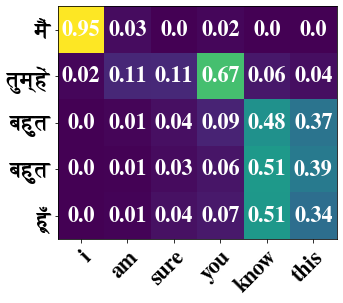

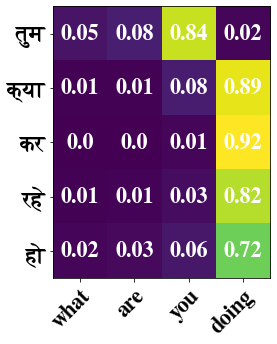

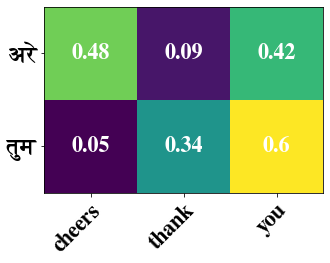

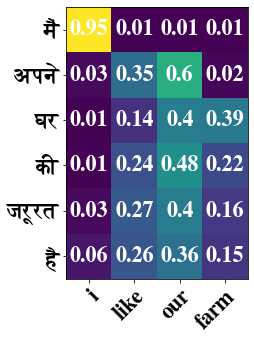

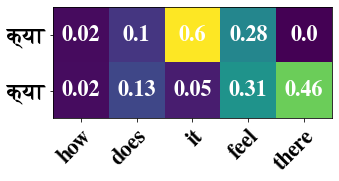

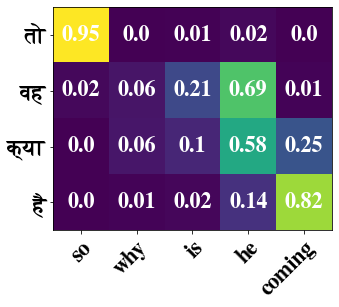

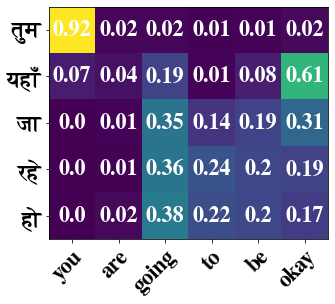

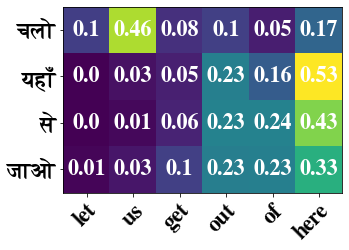

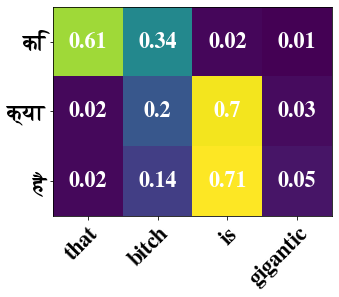

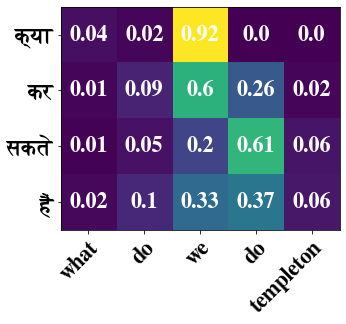

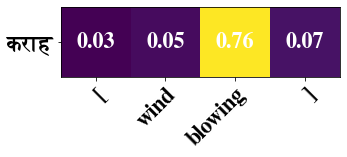

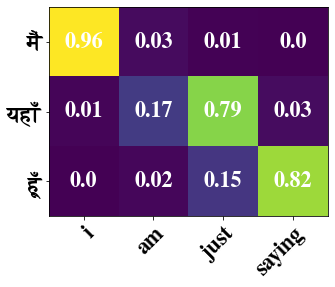

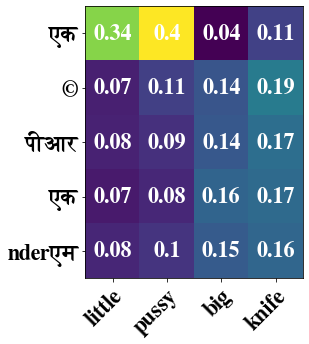

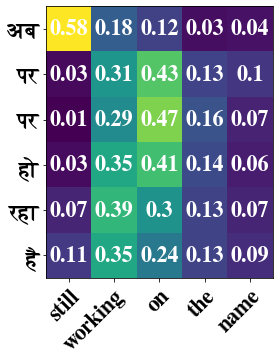

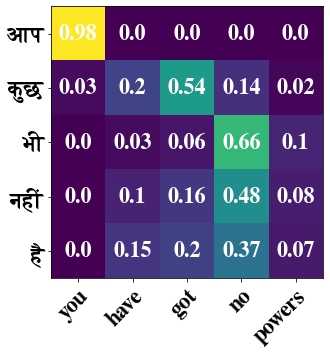

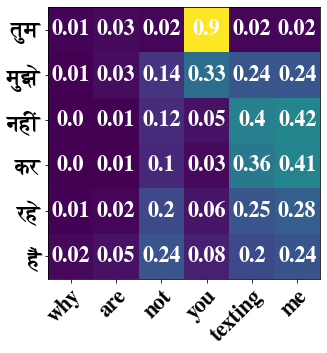

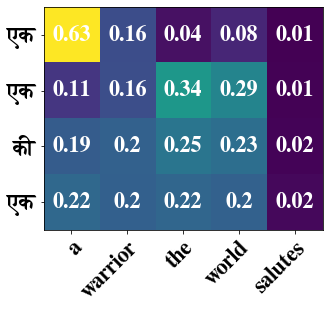

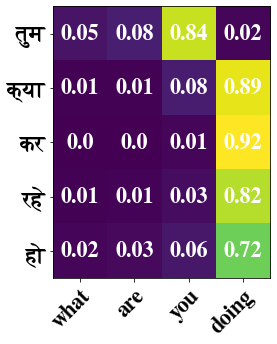

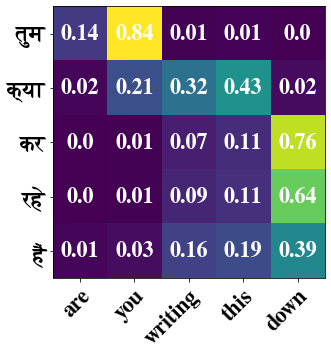

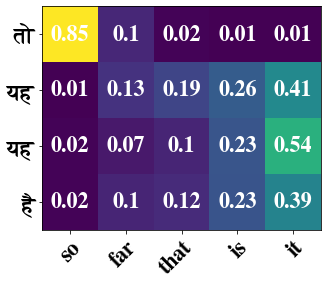

In [15]:
_=to_be_analized.apply(show_attention,axis=1)